# Постановка задачи

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1($\beta$ = 1) > 0.5 при Precision > 0.5 и Recall > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной (0 или 1, а НЕ вероятность) для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.



# Выгрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

%matplotlib inline

# Обзор данных

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - кредитный рейтинг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [2]:
TRAIN_DATASET_PATH = 'Data/course_project_train.csv'
TEST_DATASET_PATH = 'Data/course_project_test.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test  = pd.read_csv(TEST_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df_train.shape

(7500, 17)

In [5]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

**Обзор целевой переменной**

In [6]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

**Обзор количественных признаков**

In [7]:
df_train.describe().applymap(lambda x: f"{x:.0f}")

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5943,7500,7500,7500,7500,7500,3419,7486,7500,7500,7500,5943,7500
mean,1366392,0,11,18,945154,0,35,0,11873177,289833,18314,1151,0
std,845339,0,5,7,16026217,0,22,0,31926123,317871,11927,1604,0
min,164597,0,2,4,0,0,0,0,11242,0,0,585,0
25%,844341,0,8,14,279230,0,16,0,180169,114256,10068,711,0
50%,1168386,0,10,17,478159,0,32,0,309573,209323,16076,731,0
75%,1640137,0,14,22,793502,0,50,0,519882,360406,23818,743,1
max,10149344,7,43,58,1304726170,7,118,4,99999999,6506797,136679,7510,1


In [8]:
df_train[df_train['Current Credit Balance']==0]['Number of Credit Problems'].value_counts()

0.0    51
1.0     1
2.0     1
Name: Number of Credit Problems, dtype: int64

In [9]:
df_train[(df_train['Number of Credit Problems'] > 0) & (df_train['Current Credit Balance'] == 0 )]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
2446,Home Mortgage,NaN,5 years,0.0,5.0,20.1,0.0,1.0,NaN,0.0,debt consolidation,Long Term,460394.0,0.0,11469.0,NaN,1
3539,Rent,NaN,< 1 year,0.0,13.0,15.8,0.0,2.0,41.0,0.0,vacation,Short Term,134354.0,0.0,6130.0,NaN,0


**Обзор номинативных/категориальных признаков**

In [10]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

## **Обработка пропусков**

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [12]:
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

<AxesSubplot:>

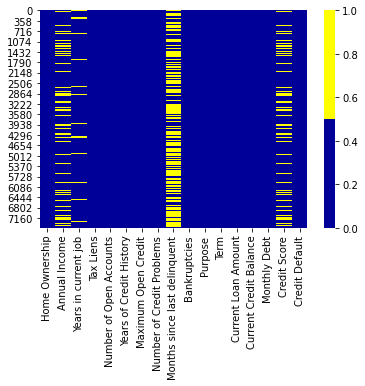

In [13]:
cols = df_train.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

###  Months since last delinquent

Пропусков наблюдается больше половины. Поэтому предположим, что они связаны с тем, что при отсутствии просрочки не ставится число 0

<AxesSubplot:>

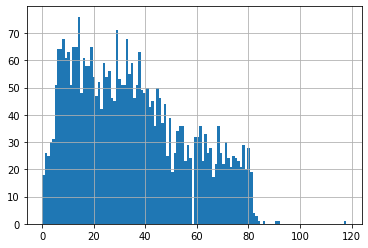

In [14]:
df_train['Months since last delinquent'].hist(bins=120)

Используем **Indicator method**
- По логике вещей он является оптимальным. Пропусков слишком много и логично предположить что они связаны с тем, что у клиента не было просрочки. Но просто поставить 0 мы не можем, так как это исказит смысл данных

In [15]:
df_train.loc[:,'Indicator']=0
df_train.loc[df_train['Months since last delinquent'].isnull(),'Indicator'] = 1
df_train['Months since last delinquent'].fillna(0,inplace=True)    

In [16]:
df_test.loc[:,'Indicator']=0
df_test.loc[df_train['Months since last delinquent'].isnull(),'Indicator'] = 1
df_test['Months since last delinquent'].fillna(0,inplace=True)    

###  Annual Income and Credit Score

Мы объединим эти показатели в один так как визуально видно, что количество пропусков в годовом доходе примерно совпадает
с количеством пропусков в кредитном рейтинге

<AxesSubplot:>

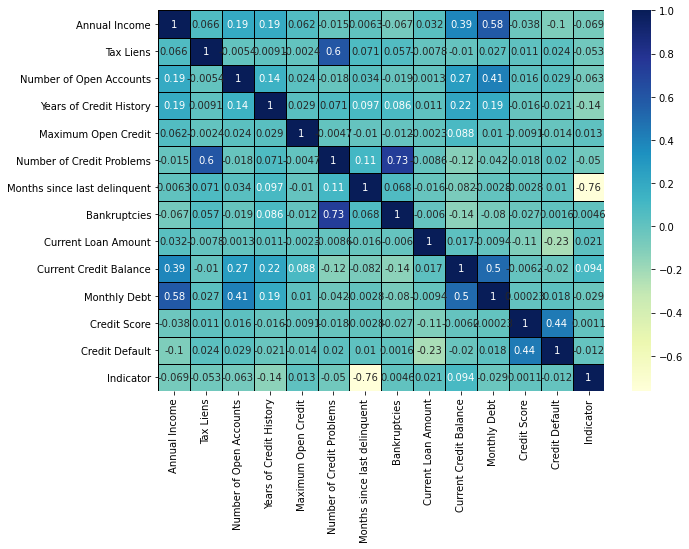

In [17]:
plt.figure(figsize=(10,7))

sns.heatmap(df_train.corr(),annot=True,linecolor='black',linewidth=1,cmap="YlGnBu")

 - Мы видим высокую корреляцию между банкротствами и количеством кредитных проблем, что логично - большое количество проблем приводит к банкротству
 - Также стоит отметить высокую корреляцию Indicator и Months since last delinquent. Как искуственно созданной переменной
 - Корреляция между Monthly Debt и Annual Income,Current Credit Balance тоже кажется логичной. Чем больше у человека годовой доход, тем больше кредитов ему выдают и тем больше кредитный баланс
 - Корреляция между Tax Liens и Number of Credit Problems достаточно неожиданная. Есть зависимость между тем, получает ли человек налоговые льготы и тем, есть ли у него кредитные проблемы

Как мы видим между *Annual Income and Credit Score* нету прямой зависимости. Построим график

<AxesSubplot:xlabel='Annual Income', ylabel='Credit Score'>

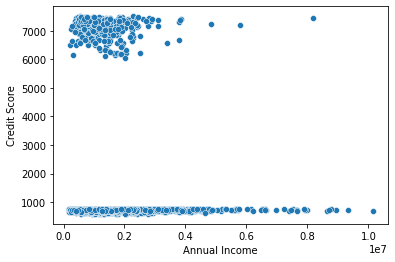

In [18]:
sns.scatterplot(data = df_train,x = 'Annual Income',y = 'Credit Score')

In [19]:
df_train[df_train['Annual Income'].isnull()]['Credit Score'].unique()

array([nan])

Да мы видим, что количество совпадает. Если нету годового дохода, значит и нету кредитного рейтинга

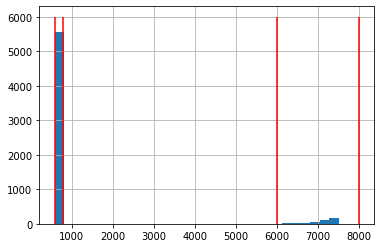

In [20]:
ax = df_train['Credit Score'].hist(bins=30)
ax.vlines(600,ymin=0,ymax=6000,colors='r')
ax.vlines(800,ymin=0,ymax=6000,colors='r')

ax.vlines(6000,ymin=0,ymax=6000,colors='r')
ax.vlines(8000,ymin=0,ymax=6000,colors='r')

Можно заметить тенденцию, что кредитный рейтинг сначала идет от 600 до 700, но через определенный промежуток считается от 6000 до 8000

In [21]:
print(df_train['Credit Score'].describe(),'\n')

print(df_train['Credit Score'].median(),'\n')

print(stats.mode(df_train['Credit Score'].dropna()))

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64 

731.0 

ModeResult(mode=array([740.]), count=array([169]))


In [22]:
df_train['Credit Score'].fillna(df_train['Credit Score'].median(),inplace = True)
df_test['Credit Score'].fillna(df_test['Credit Score'].median(),inplace = True)

In [23]:
df_train['Annual Income'].fillna(df_train['Annual Income'].median(),inplace = True)
df_test['Annual Income'].fillna(df_test['Annual Income'].median(),inplace = True)

 Введем два новых показателя

In [24]:
df_train['Credit_Score_2'] = df_train['Credit Score']
df_train['Credit_Score_2'] = df_train['Credit Score'].apply(lambda x: x/10 if x>1000 else x)
df_train['Credit_Score_ind'] = df_train['Credit Score'].apply(lambda x: 1 if x>1000 else 0)

df_test['Credit_Score_2'] = df_test['Credit Score']
df_test['Credit_Score_2'] = df_test['Credit Score'].apply(lambda x: x/10 if x>1000 else x)
df_test['Credit_Score_ind'] = df_test['Credit Score'].apply(lambda x: 1 if x>1000 else 0)

<AxesSubplot:xlabel='Annual Income', ylabel='Credit_Score_ind'>

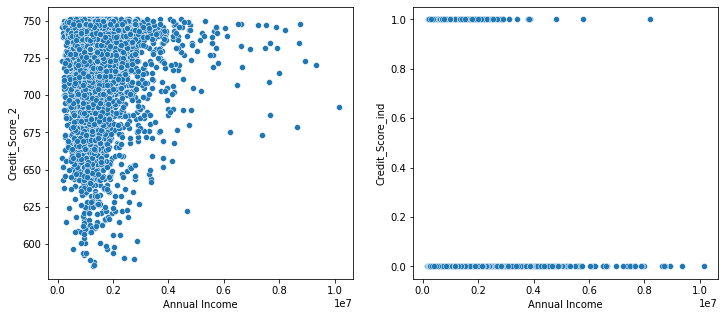

In [25]:
fig, axs = plt.subplots(1,2,figsize=(12,5)) 

sns.scatterplot(data = df_train,x = 'Annual Income',y = 'Credit_Score_2',ax = axs[0])
sns.scatterplot(data = df_train,x = 'Annual Income',y = 'Credit_Score_ind',ax = axs[1])

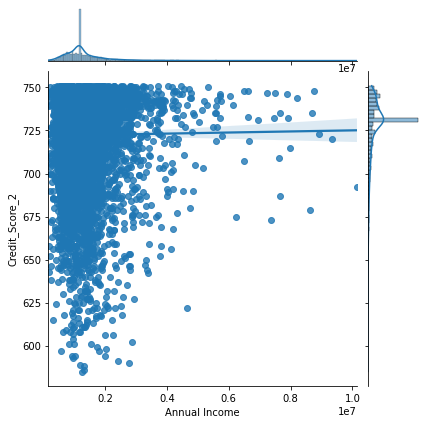

In [26]:
sns.jointplot(data = df_train,x = 'Annual Income',y = 'Credit_Score_2', kind='reg' )

Как мы видим наша замена не подходит, так как сильно искажает выборку. В дальнейшем попробуем улучшить ее при помощи линейной регрессии

###  Years in current job


In [27]:


columns_ = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]


In [28]:
s = df_train.pivot_table(columns= 'Years in current job',aggfunc = 'count' )[columns_].loc['Annual Income']

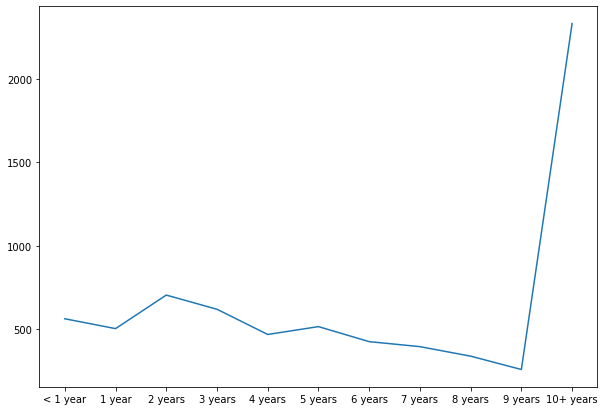

In [29]:
plt.figure(figsize=(10,7))
plt.plot(s)

Заменим на самое популярное значение

In [30]:
df_train['Years in current job'].fillna('10+ years',inplace = True)
df_test['Years in current job'].fillna('10+ years',inplace = True)

###  Bankruptcies


In [31]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [32]:
df_train.loc[df_train['Bankruptcies'].isnull(),:]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Indicator,Credit_Score_2,Credit_Score_ind
100,Own Home,337079.0,1 year,0.0,9.0,39.6,644204.0,0.0,0.0,NaN,educational expenses,Short Term,99999999.0,224770.0,4326.0,734.0,0,0,734.0,0
256,Rent,857660.0,1 year,0.0,6.0,19.7,291082.0,0.0,0.0,NaN,debt consolidation,Short Term,99999999.0,236816.0,3488.0,743.0,0,0,743.0,0
257,Home Mortgage,1168386.0,2 years,0.0,15.0,13.6,1556390.0,0.0,0.0,NaN,debt consolidation,Short Term,447480.0,524210.0,19613.0,731.0,0,0,731.0,0
898,Rent,739005.0,2 years,0.0,20.0,18.3,2177758.0,0.0,0.0,NaN,debt consolidation,Short Term,456808.0,607487.0,9669.0,732.0,1,0,732.0,0
1404,Rent,349391.0,< 1 year,0.0,4.0,12.7,0.0,0.0,0.0,NaN,other,Short Term,11242.0,0.0,1243.0,747.0,0,0,747.0,0
3063,Rent,464474.0,10+ years,0.0,5.0,14.9,38126.0,0.0,0.0,NaN,other,Short Term,44814.0,18373.0,929.0,7490.0,1,0,749.0,1
3252,Rent,832770.0,< 1 year,0.0,7.0,16.5,636856.0,0.0,0.0,NaN,business loan,Short Term,156970.0,52250.0,1145.0,750.0,0,0,750.0,0
3351,Home Mortgage,2226192.0,8 years,0.0,14.0,23.3,792836.0,0.0,73.0,NaN,debt consolidation,Short Term,528968.0,625157.0,23746.0,674.0,0,0,674.0,0
3401,Rent,326154.0,6 years,0.0,2.0,19.1,0.0,0.0,77.0,NaN,other,Short Term,99999999.0,0.0,1245.0,712.0,0,0,712.0,0
3496,Rent,233567.0,1 year,0.0,7.0,11.7,0.0,0.0,0.0,NaN,educational expenses,Short Term,210166.0,0.0,0.0,746.0,0,0,746.0,0


In [33]:
df_train['Bankruptcies'].fillna(0,inplace = True)
df_test['Bankruptcies'].fillna(0,inplace = True)

## **Обработка выбросов**

<AxesSubplot:>

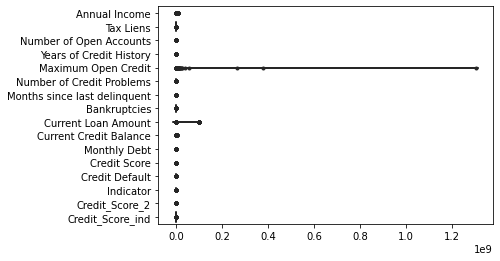

In [34]:
sns.violinplot(data=df_train, palette="light:g", inner="points", orient="h")


### Maximum Open Credit

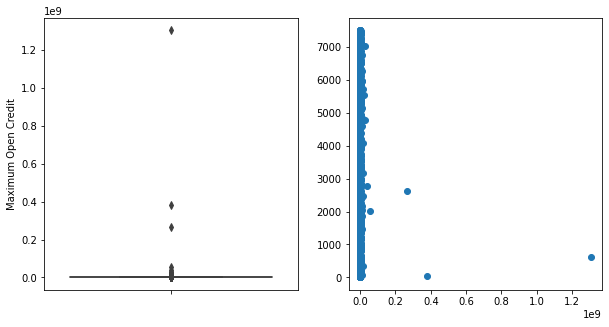

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=df_train, y = 'Maximum Open Credit')
plt.subplot(122)
plt.scatter(df_train['Maximum Open Credit'],df_train.index,)

Исключаем первые пять значений

In [36]:
df_train['Maximum Open Credit'].sort_values(ascending=False)[:10]

617     1.304726e+09
44      3.800523e+08
2617    2.655129e+08
2023    5.756256e+07
2763    4.092389e+07
7026    2.640700e+07
4769    2.634333e+07
5523    2.137243e+07
5731    1.928043e+07
3170    1.868381e+07
Name: Maximum Open Credit, dtype: float64

In [37]:
df_train = df_train[df_train['Maximum Open Credit']<40000000]
df_test = df_test[df_test['Maximum Open Credit']<40000000]

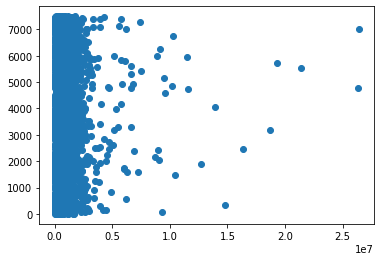

In [38]:
plt.scatter(df_train['Maximum Open Credit'],df_train.index)

### Current Loan Amount

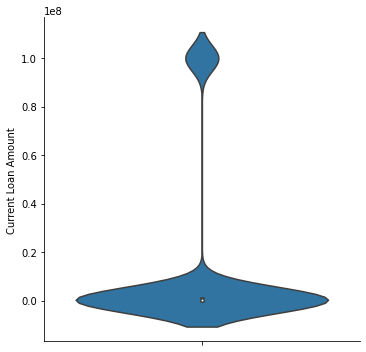

In [39]:
sns.catplot(y="Current Loan Amount",
               data=df_train, kind="violin")

На данный момент я бы не стал относить текущую сумму кредита к выбросам. Четко выделяется два сегмента

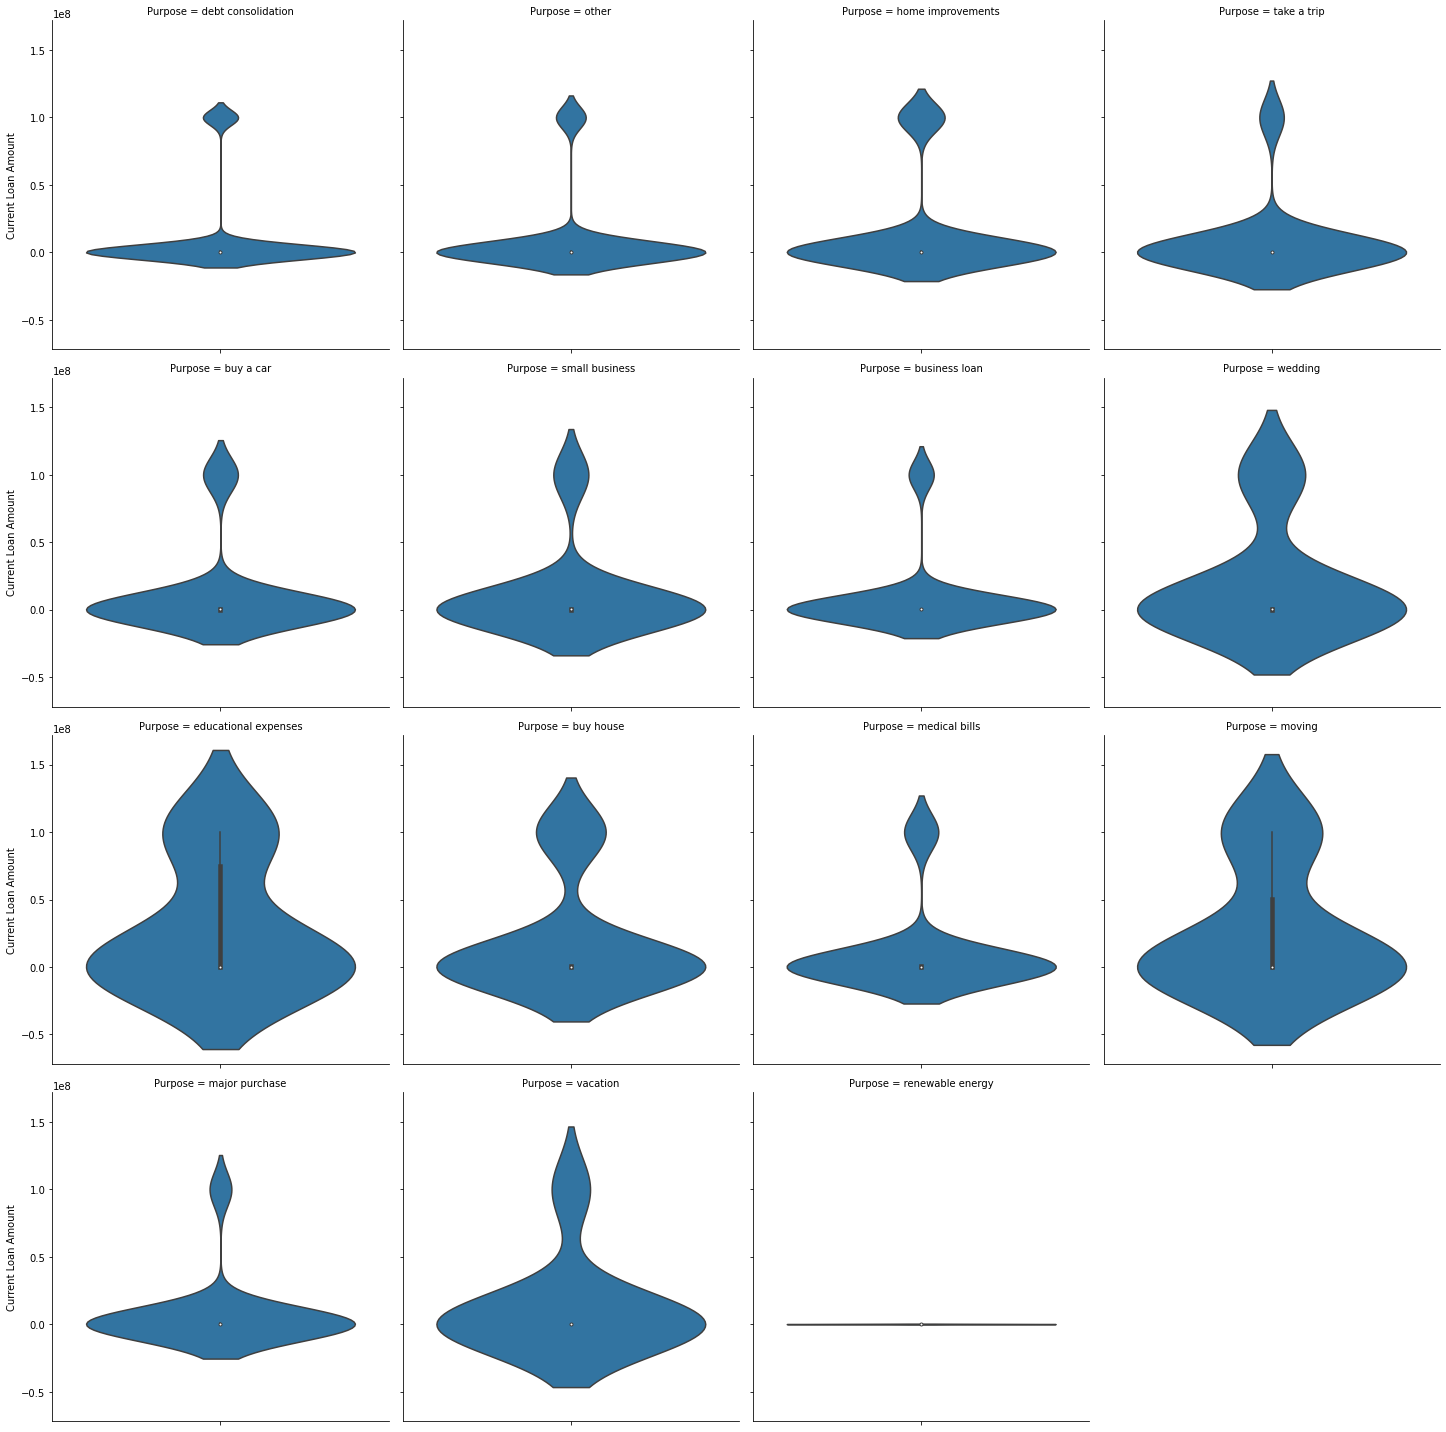

In [40]:
sns.catplot(y="Current Loan Amount", col = 'Purpose',
               data=df_train, kind="violin", col_wrap=4)

# Создание новых признаков

# Преобразование датасета для загрузки в модель

## Категориальные признаки

In [41]:
df_train.describe(include = 'object')

,Home Ownership,Years in current job,Purpose,Term
count,7495,7495,7495,7495
unique,4,11,15,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3634,2699,5943,5551


### Term

In [42]:
df_train['Term'] = df_train['Term'].replace({'Short Term':0, 'Long Term':1})
df_train['Term'] = df_train['Term'].replace({'Short Term':0, 'Long Term':1})

### Purpose

In [45]:
df_train['Purpose'].value_counts()

debt consolidation      5943
other                    663
home improvements        411
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               36
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [57]:
df_train.replace({'Purpose' : {'renewable energy' : df_train['Purpose'].mode()}},inplace = True)
df_test.replace({'Purpose' : {'renewable energy' : df_test['Purpose'].mode()}},inplace = True)

In [58]:
purpose_pr = pd.get_dummies(df_train['Purpose'])
purpose_pr_test = pd.get_dummies(df_test['Purpose'])

df_train[purpose_pr.columns] = purpose_pr
df_test[purpose_pr.columns] = purpose_pr_test
#df_test.loc[:,'renewable energy'] = 0

### Home Ownership

In [59]:
home_pr = pd.get_dummies(df_train['Home Ownership'])
home_pr_test = pd.get_dummies(df_test['Home Ownership'])

df_train[home_pr.columns] = home_pr
df_test[home_pr.columns] = home_pr_test

### Years in current job

In [60]:
df_train['Years in current job'].unique()

array(['10+ years', '8 years', '6 years', '7 years', '5 years', '1 year',
       '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [61]:
def rep_text_year(text):
    words = ['+',' years',' year']
    text = text.replace('< 1','0')
    for word in words:
        text = text.replace(word,'')
    return text

In [62]:
df_train['Years in current job'] = df_train['Years in current job'].apply(rep_text_year).astype(int)
df_test['Years in current job'] = df_test['Years in current job'].apply(rep_text_year).astype(int)


## Обучающая, валидационная и тестовая выборки

In [68]:
X_train_all =  df_train.drop(labels = ['Home Ownership','Credit Default'],axis = 1)
y_train_all = df_train['Credit Default']

In [71]:
X_test =  df_test.drop(labels = ['Home Ownership'],axis = 1)